Тимофеев Алексей Владимирович, М8О-407Б-19

## Heart Attack Analysis & Prediction Dataset
## Набор данных для прогнозирования сердечной недостаточности
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, recall_score, precision_score, max_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform


# Классификация

In [2]:
data = pd.read_csv('heart.csv')
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Об этом наборе данных

* Age : Возраст пациента

* Sex: Пол пациента

* exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

* cp: тип боли в груди тип боли в груди

    * Value 1: типичная стенокардия
    * Value 2: атипичная стенокардия
    * Value 3: неангинальная боль
    * Value 4: бессимптомное течение
* trtbps: артериальное давление в состоянии покоя (в мм рт. ст.)

* chol: холесторал в мг / дл, определяемый с помощью датчика ИМТ

* fbs: (уровень сахара в крови натощак> 120 мг / дл) (1 = истина; 0 = ложь)

* rest_ecg : результаты электрокардиографии в состоянии покоя

    * Value 0: нормальное
    * Value 1: аномалия зубца ST-T (инверсия зубца T и / или повышение или понижение ST> 0,05 мВ)
    * Value 2: отображение вероятной или определенной гипертрофии левого желудочка по критериям Эстеса
    
* thalach: достигнута максимальная частота сердечных сокращений

* target : 0 = меньше шансов сердечного приступа 1 = больше шансов сердечного приступа


Сначала проверим датасет на наличие в нем пустых ячеек, с помощью info().
Таковых там не оказалось.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Так как все данные записаны в численном виде, мне не пришлось придумывать, как
символьным данным сопоставить числа.
Дальше я проверил существуют ли повторяющиеся строки и если существуют, то
дублирующаяся строка удаляется.


In [4]:
print(data.shape)

(303, 14)


In [5]:
data.drop_duplicates(keep='last')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Далее я перешел непосредственно к анализу зависимостей в данных, построил корреляционную матрицу.

In [6]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Далее я построил тепловую карту корреляционной матрицы.

<AxesSubplot:>

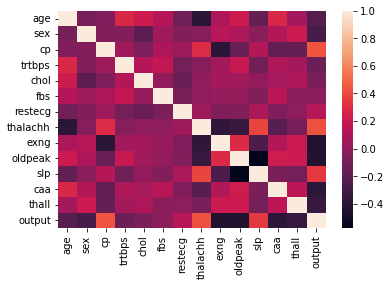

In [7]:
sns.heatmap(data.corr())


Так как целевым параметром является параметр output (0 = меньше вероятность сердечного приступа 1 = больше вероятность сердечного приступа) проанализируем последнюю колонку или строку.  Из матрицы видно, что больше всего на этот параметр влияют: тип боли в груди (cp), достигнутая максимальная частота сердечных сокращений (thalachh), стенокардия, вызванная физической нагрузкой  (exng), подавление сегмента ST, вызванное упражнением относительно отдыха. (oldpeak).

А меньше всего - холесторал в мг / дл (chol) и уровень сахара в крови натощак (fbs). Также из матрицы видно, что
остальные параметры сильно между собой некоррелируют, следовательно, можно не
удалять/объединять их.

Дальше я рассмотрел параметры моих признаков в датасет

In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Также можно подтвердить, что данные находятся в указанных диапазонах,
как и говорится в описании к датасету.

Далее построим гистаграммы распределения признаков. Для колличественных построим графики, где по оси X указывается значение параметра, а по Y - его количество

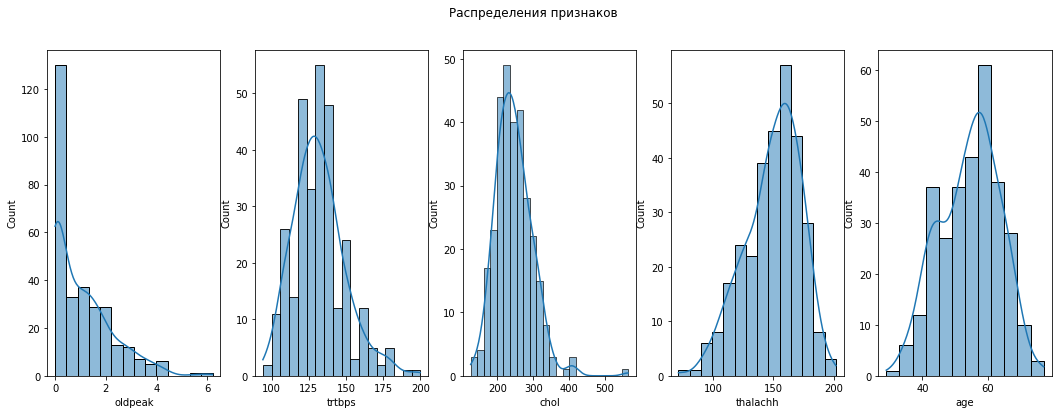

In [9]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['oldpeak'], ax = ax[0], kde = True)
sns.histplot(data['trtbps'], ax = ax[1], kde = True)
sns.histplot(data['chol'], ax = ax[2], kde = True)
sns.histplot(data['thalachh'], ax = ax[3], kde = True)
sns.histplot(data['age'], ax = ax[4], kde = True)
None

Из графиков видно, что значения распределены неравномерно, но эти распределения
похожи на нормальные. Также на данных гистаграммах мной не были замечены выбросы, следовательно никаких изменений в датасет вносить не надо.

Также на графике oldpeak видно, что много людей с ST = 0, что является патологией. Скорее
всего, датасет был основан на людях с больным сердцем, это косвенно подтверждает возраст указанный в выборке. Все пациенты из датасета в примерно попадают в диапазон от 40 до 60 лет


Далее построим диаграммы для категориальных признаков.

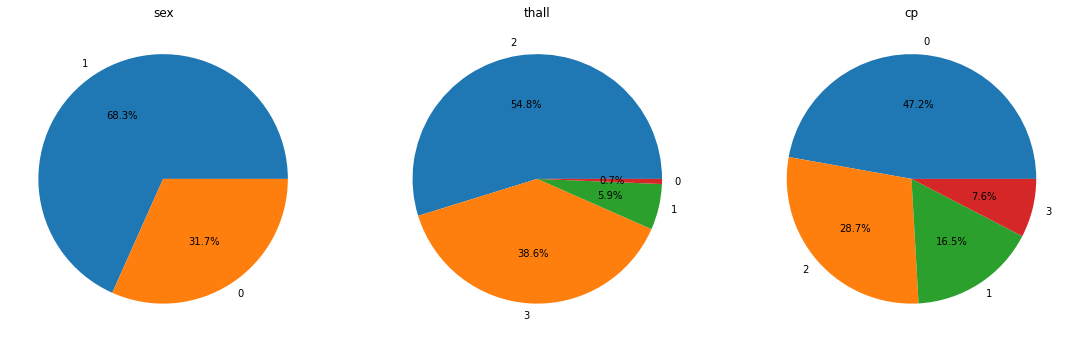

In [10]:
fig = plt.figure(figsize=(19,19))
plt.subplot(1, 3, 1)
plt.pie(data["sex"].value_counts(), labels = data["sex"].value_counts().index, autopct='%1.1f%%')
plt.title("sex")

plt.subplot(1, 3, 2)
plt.pie(data["thall"].value_counts(), labels = data["thall"].value_counts().index, autopct='%1.1f%%')
plt.title("thall")

plt.subplot(1, 3, 3)
plt.pie(data["cp"].value_counts(), labels = data["cp"].value_counts().index, autopct='%1.1f%%')
plt.title("cp")

plt.show()


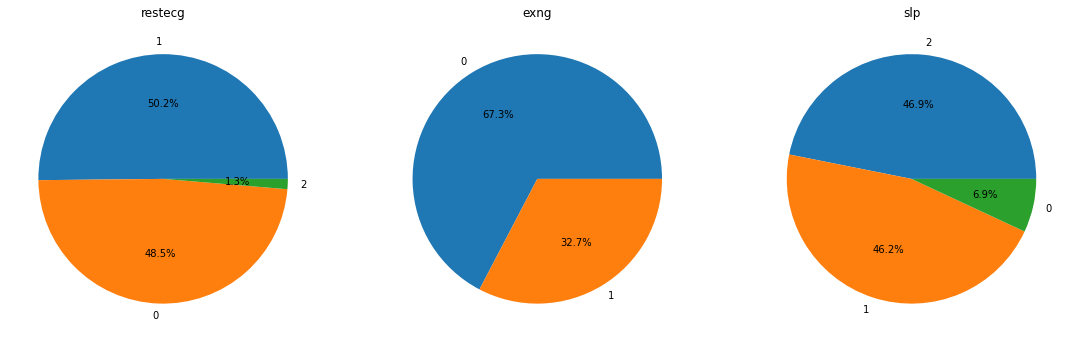

In [11]:
fig = plt.figure(figsize=(19,19))
plt.subplot(1, 3, 1)
plt.pie(data["restecg"].value_counts(), labels = data["restecg"].value_counts().index, autopct='%1.1f%%')
plt.title("restecg")

plt.subplot(1, 3, 2)
plt.pie(data["exng"].value_counts(), labels = data["exng"].value_counts().index, autopct='%1.1f%%')
plt.title("exng")

plt.subplot(1, 3, 3)
plt.pie(data["slp"].value_counts(), labels = data["slp"].value_counts().index, autopct='%1.1f%%')
plt.title("slp")


plt.show()

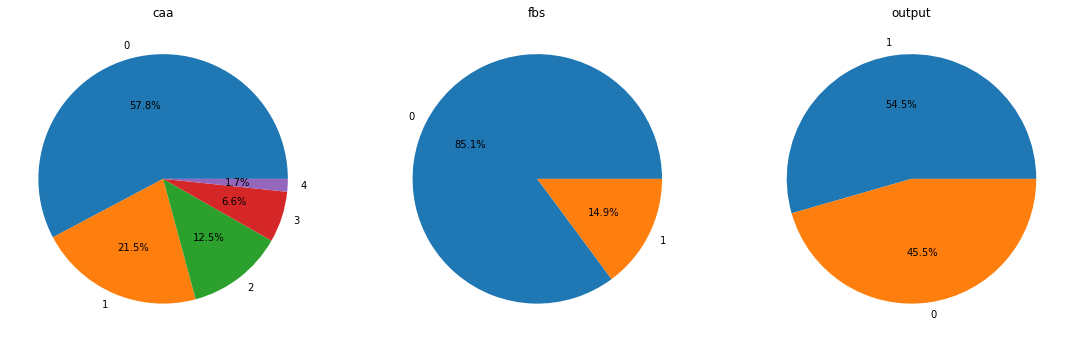

In [12]:
fig = plt.figure(figsize=(19,19))
plt.subplot(1, 3, 1)
plt.pie(data["caa"].value_counts(), labels = data["caa"].value_counts().index, autopct='%1.1f%%')
plt.title("caa")

plt.subplot(1, 3, 2)
plt.pie(data["fbs"].value_counts(), labels = data["fbs"].value_counts().index, autopct='%1.1f%%')
plt.title("fbs")

plt.subplot(1, 3, 3)
plt.pie(data["output"].value_counts(), labels = data["output"].value_counts().index, autopct='%1.1f%%')
plt.title("output")

plt.show()

Из данных диаграмм видно, что данные распределены неравномерно. Из диаграммы outout видно, что больных и здоровых людей примерно поровну, так что оверсемплинг делать не требуется.

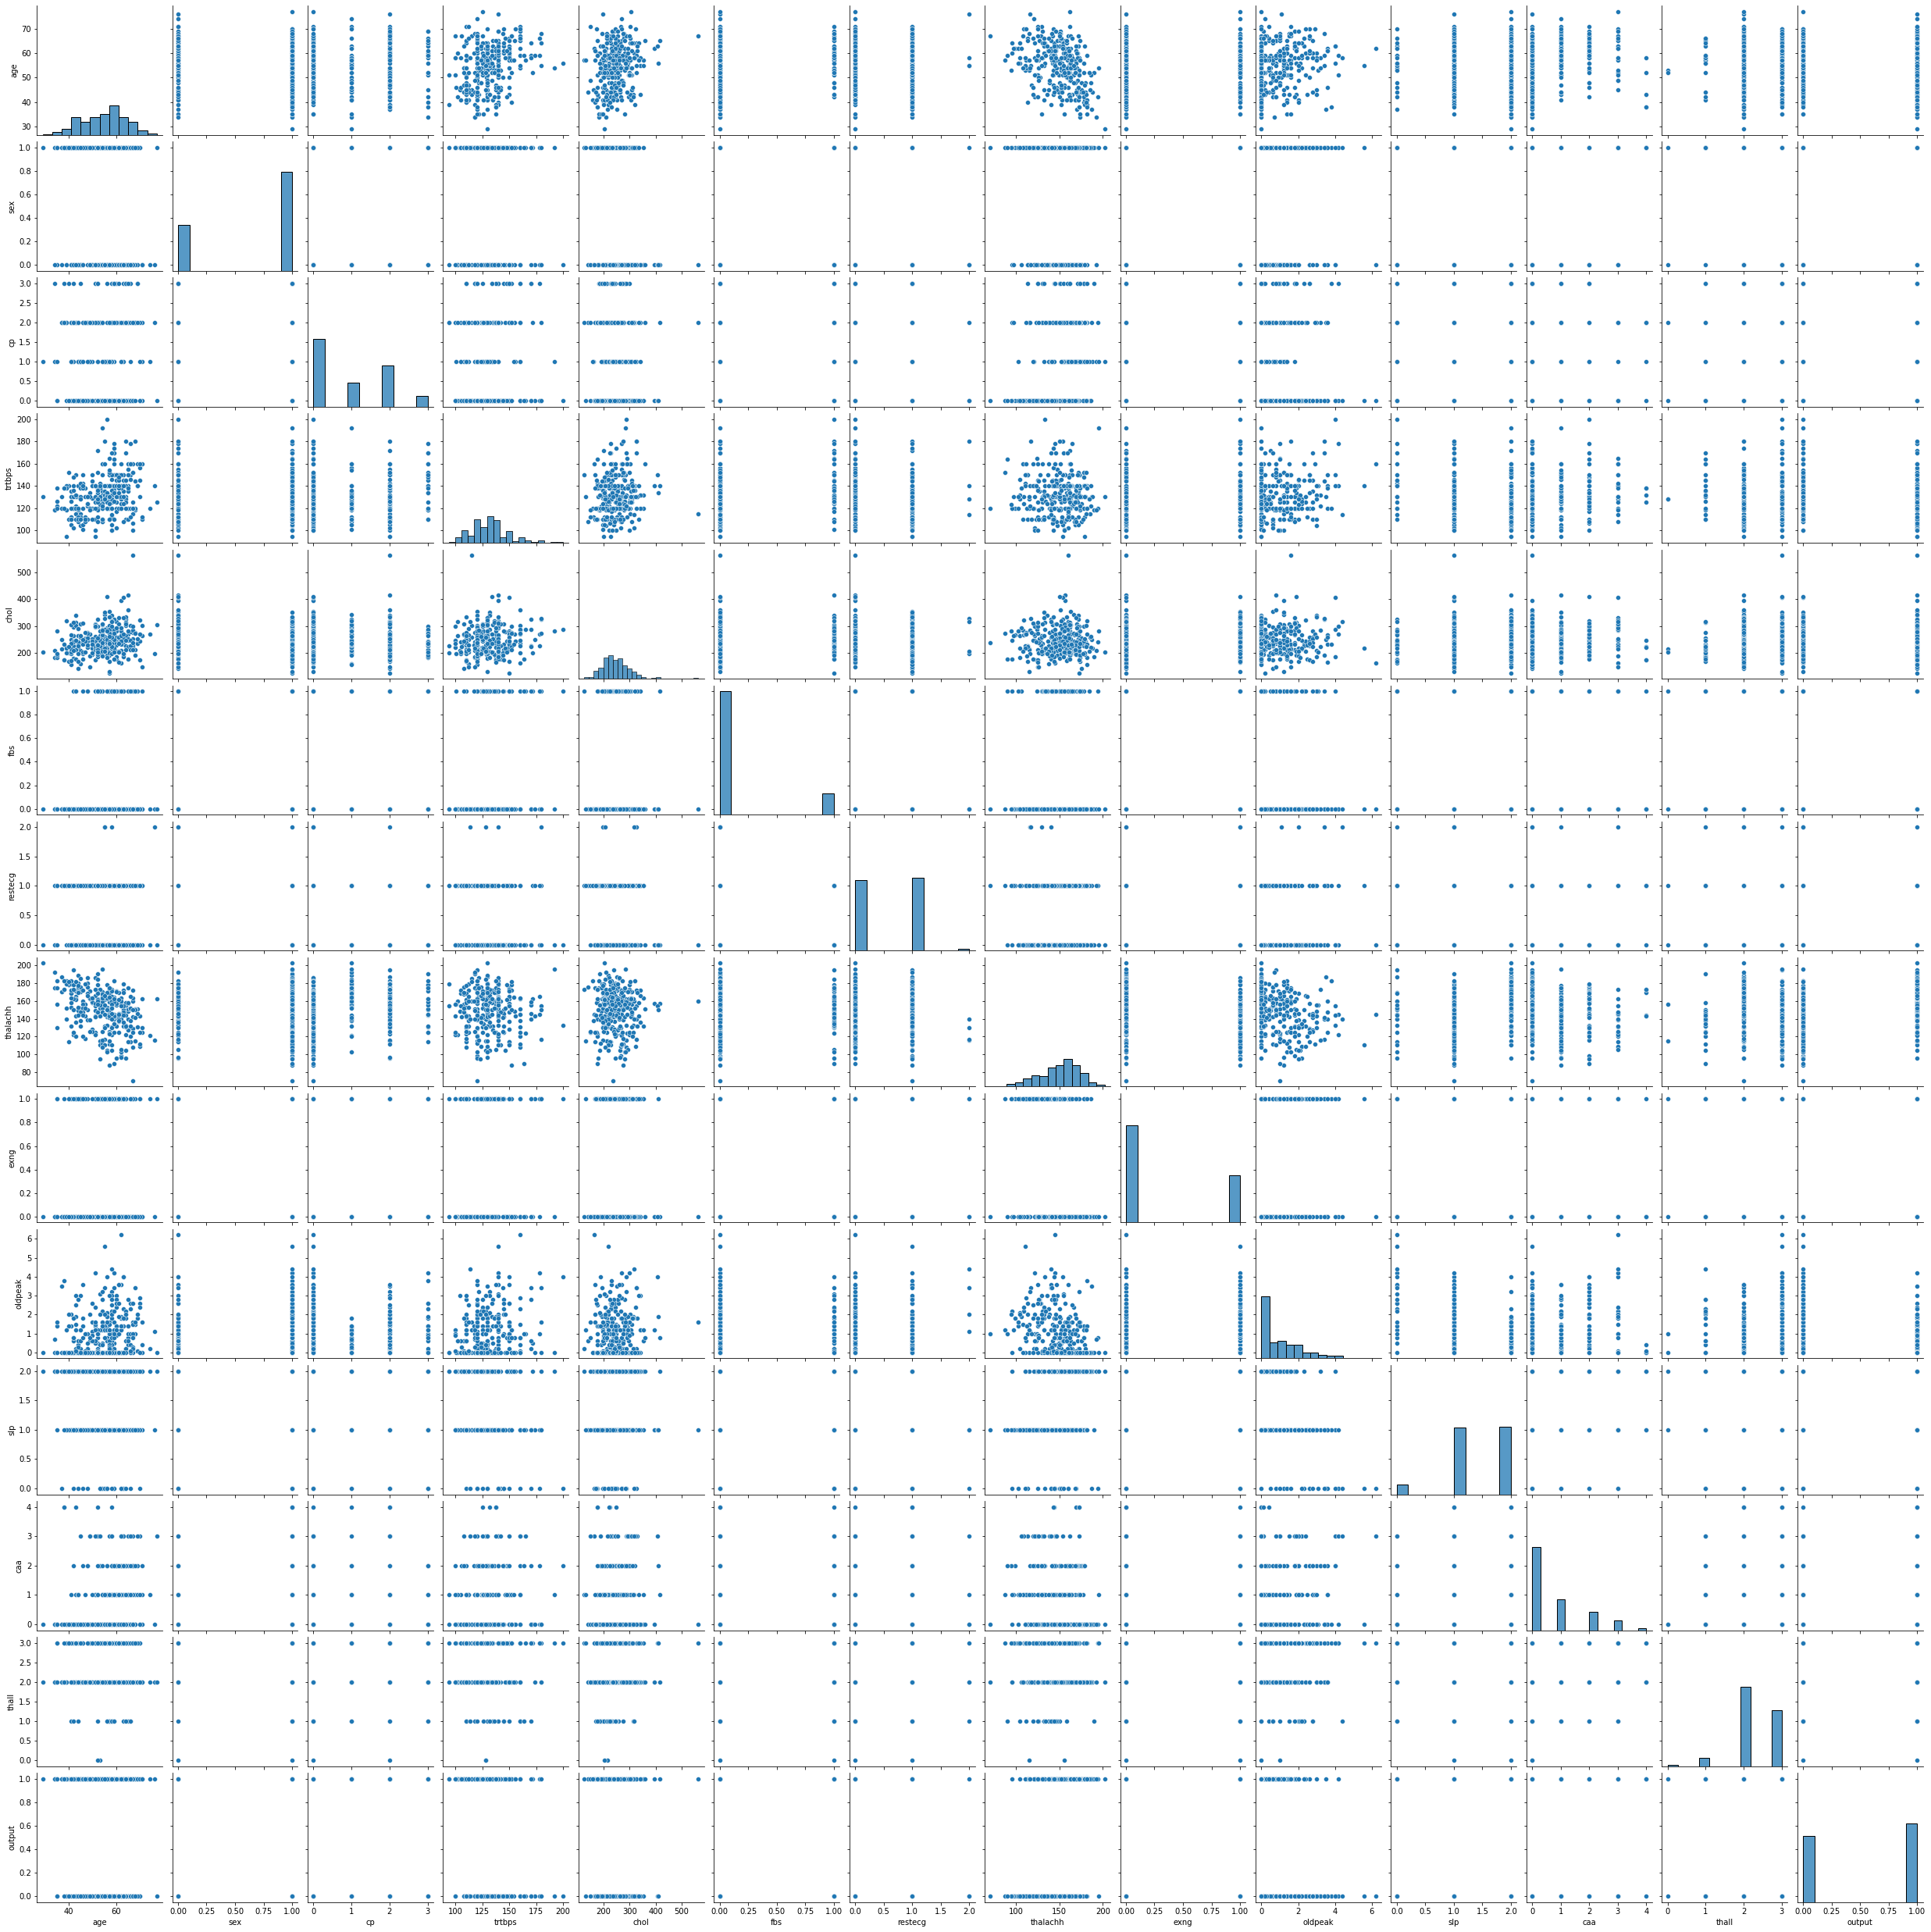

In [13]:
sns.pairplot(data=data)
None


По диаграммам видно, чтобы предсказать параметр output, нужно решить задачу классификации(выбор между двумя классами 0 и 1). Для этого подойдет логистическая регрессия, реализованная в sklearn.

### Обучение модели

Функция для вывода результатов обучения

In [14]:
def scores(model, X, y_true):
    y_pred = model.predict(X)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    figure = plt.figure(figsize = (20, 5))
    matr = confusion_matrix(y_true, y_pred)
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(matr).plot(ax = ax)
    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay.from_predictions(y_true = y_true, y_pred = y_pred, name = "ROC-кривая", ax = ax)
    plt.show()

Разбиваем данные на признаки и целевую переменную

In [15]:
X = data.drop("output", axis = 1).to_numpy()
Y = data["output"].to_numpy()

print("Размерность входных данных:", X.shape)
print("Размерность выходных данных:", Y.shape)

Размерность входных данных: (303, 13)
Размерность выходных данных: (303,)


Разбиваю на обучающую и тестовую выборку

In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 1, shuffle = True)

print("Размерность тренировочных входных данных:", train_X.shape)
print("Размерность тренировочных выходных данных:", train_Y.shape)

print("Размерность тестовых входных данных:", test_X.shape)
print("Размерность тестовых выходных данных:", test_Y.shape)

Размерность тренировочных входных данных: (242, 13)
Размерность тренировочных выходных данных: (242,)
Размерность тестовых входных данных: (61, 13)
Размерность тестовых выходных данных: (61,)


Логистическая регрессия - LogisticRegression.

In [17]:
logistic = LogisticRegression(max_iter=10000,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(train_X, train_Y)

Accuracy: 0.7377049180327869
Recall: 0.8064516129032258
Precision: 0.7142857142857143


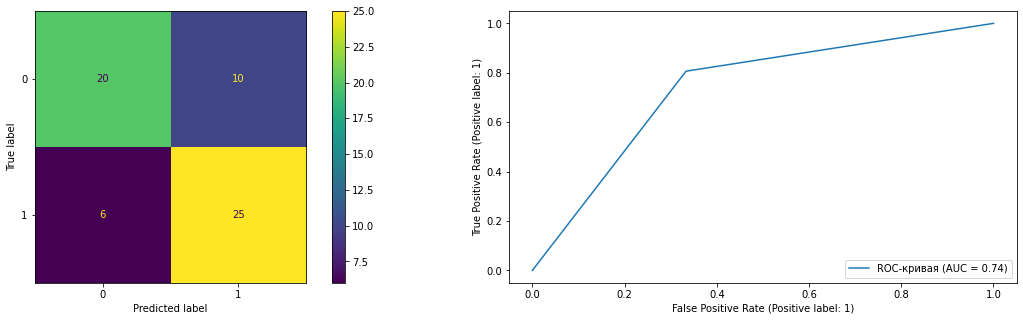

In [18]:
scores(search, test_X, test_Y)

# Logistic Regression

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
class Logistic(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, nepoch, batch_size):
        self.lr = lr
        self.nepoch = nepoch
        self.batch_size = batch_size
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                s = self.sigmoid(p)
                dp = np.dot(xb.T, (s - yb).T)
                self.W -= self.lr * dp
        
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis = 1)
        p = np.dot(self.W, maindata.T)
        s = self.sigmoid(p)
        return (s > 0.5).astype('int64')

    def sigmoid(self, x):
        self.l = 1 / (1 + np.exp(-x))
        return self.l


In [20]:
from sklearn.preprocessing import Normalizer

log = Pipeline(steps = [('normalizer', Normalizer()),('log', Logistic(0.1, 10, 5))])
print(log.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('log', Logistic(batch_size=5, lr=0.1, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'log': Logistic(batch_size=5, lr=0.1, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'log__batch_size': 5, 'log__lr': 0.1, 'log__nepoch': 10}


{'log__batch_size': 1, 'log__lr': 0.1, 'log__nepoch': 20}
Accuracy train: 0.6449829931972789
Accuracy: 0.5737704918032787
Recall: 0.7419354838709677
Precision: 0.5609756097560976


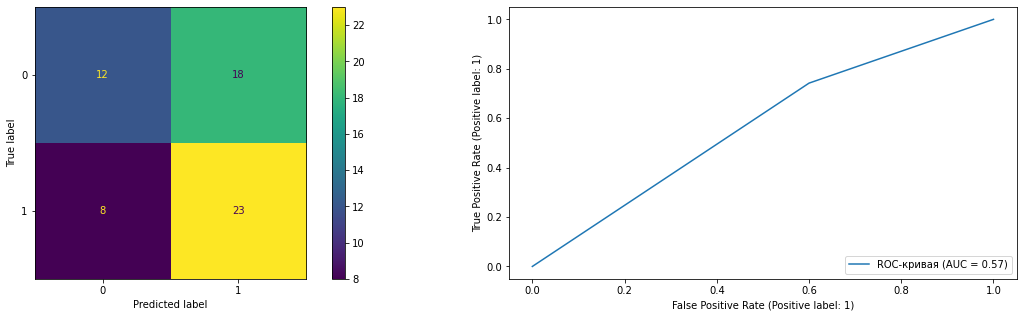

In [21]:
gcv = GridSearchCV(estimator = log, param_grid={'log__nepoch': [1, 5, 10, 20], 'log__batch_size': [1, 5, 10], 'log__lr': [0.1, 0.01, 0.001]})
gcv.fit(train_X, train_Y)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
 
Log_best = gcv.best_estimator_
scores(Log_best, test_X, test_Y)

# Регрессия

## TED Talks 2022
## Этот набор данных содержит данные из 5700 выступлений на TED.
https://www.kaggle.com/datasets/miguelcorraljr/ted-talks-2022

## Дерево решений

In [22]:
class DecisionTree(BaseEstimator, RegressorMixin):
    class Node:
        def __init__(self):
            self.feature = -1
            self.value = None
            self.left = None
            self.right = None
    
    def __init__(self, min_leaf_size=5, max_depth=None, criterion='mse', answer='mean', features=None):
        self.min_leaf_size = min_leaf_size
        self.max_depth = max_depth
        self.criterion = criterion
        self.answer = answer
        self.features = features
    
    def fit(self, data, target):
        self.root = self.Node()
        self.process_node(data, target, self.root, np.arange(len(target)), 0)
        return self
    
    def crit(self, y_sum, y_sq_sum, y_med_sum, n):
        if self.criterion == 'mse':
            return y_sq_sum / n - y_sum ** 2 / n ** 2
        elif self.criterion == 'mae':
            return y_med_sum / n 
        elif self.criterion == 'poisson':
            return -y_sum / n * np.log(y_sum / n)
        
    def process_node(self, data, target, node, ids, depth):
        X = data[ids]
        Y = target[ids]
        n = len(X)
        y_sum = np.sum(Y)
        y_sq_sum = np.sum(Y ** 2)
        y_med = np.median(Y)
        y_med_sum = np.sum(np.abs(Y - y_med))
        
        if (self.max_depth is not None) and depth == self.max_depth or \
           (self.min_leaf_size is not None) and n <= self.min_leaf_size:
            if self.answer == 'mean':
                node.value = y_sum / n
            elif self.answer == 'median':
                node.value = y_med
            return
        
        h = self.crit(y_sum, y_sq_sum, y_med_sum, n)
        max_value = None
        max_f = None
        max_gain = -1
        best_left_ids = None
        best_right_ids = None
        for f in (self.features if self.features is not None else range(data.shape[1])):
            sort_ids = X[:, f].argsort()
            left = 1
            left_sum = Y[sort_ids[0]]
            left_sq_sum = Y[sort_ids[0]] ** 2
            left_med_sum = np.abs(Y[sort_ids[0]] - y_med)

            while left < n:
                while left < n and X[sort_ids[left-1]][f] == X[sort_ids[left-2]][f]:
                    left += 1
                    left_sum += Y[sort_ids[left-1]]
                    left_sq_sum += Y[sort_ids[left-1]] ** 2
                    left_med_sum += np.abs(Y[sort_ids[left-1]] - y_med)
                if left == n:
                    break
                    
                left_h = self.crit(left_sum, left_sq_sum, left_med_sum, left)
                right_h = self.crit(y_sum - left_sum, y_sq_sum - left_sq_sum, y_med_sum - left_med_sum, n - left)

                gain = h - (left * left_h + (n - left) * right_h) / n
                if gain > max_gain:
                    max_gain = gain
                    max_value = X[sort_ids[left-1]][f]
                    max_f = f
                    best_left_ids = sort_ids[:left]
                    best_right_ids = sort_ids[left:]

                left += 1
                left_sum += Y[sort_ids[left-1]]
                left_sq_sum += Y[sort_ids[left-1]] ** 2
                left_med_sum += np.abs(Y[sort_ids[left-1]] - y_med)
        
        if max_value is None:
            if self.answer == 'mean':
                node.value = y_sum / n
            elif self.answer == 'median':
                node.value = y_med
            return
        
        node.feature = max_f
        node.value = max_value
        node.left = self.Node()
        node.right = self.Node()
        
        self.process_node(X, Y, node.left, best_left_ids, depth+1)
        self.process_node(X, Y, node.right, best_right_ids, depth+1)
        
    def predict(self, data):
        res = np.ndarray(data.shape[0])
        for i, obj in enumerate(data):
            node = self.root
            while node.feature != -1:
                if obj[node.feature] > node.value:
                    node = node.right
                else:
                    node = node.left
            res[i] = node.value
        return res


## Случайный лес

In [23]:

class RandomForest(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, min_leaf_size=5, max_depth=None, criterion='mse', max_features='sqrt', answer='mean', max_samples=0.8):
        self.n_estimators = n_estimators
        self.min_leaf_size = min_leaf_size
        self.max_depth = max_depth
        self.answer = answer
        self.criterion = criterion
        self.max_features = max_features
        self.max_samples = max_samples
        
    def fit(self, data, target):
        features = np.arange(data.shape[1])
        indexes = np.arange(len(data))
        samples = int(np.floor(self.max_samples * len(data)))
        if self.max_features == 'sqrt':
            max_features = int(np.floor(np.sqrt(len(features))))
        else:
            max_features = int(np.floor(len(features) * self.max_features))
        self.estimators = []
        for _ in range(self.n_estimators):
            np.random.shuffle(features)
            self.estimators.append(DecisionTree(min_leaf_size=self.min_leaf_size, max_depth=self.max_depth, criterion=self.criterion, answer=self.answer, features=features[:max_features]))
            idx = np.random.choice(indexes, (samples, ))
            self.estimators[-1].fit(data[idx], target[idx])
        
    def predict(self, data):
        pred = np.stack([est.predict(data) for est in self.estimators], axis=1)
        if self.answer == 'mean':
            return pred.mean(axis=1)
        elif self.answer == 'median':
            return np.median(pred, axis=1)

#### Анализ датасета.

In [24]:
dataTED = pd.read_csv('20221013_ted_talks.csv')
print(dataTED.shape)
dataTED.head()

(5701, 9)


,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000


In [25]:
dataTED = dataTED.drop(["talk_id", "title"], axis = 1)

In [26]:
print(dataTED.dtypes)

speaker           object
recorded_date     object
published_date    object
event             object
duration           int64
views              int64
likes              int64
dtype: object


In [27]:
print(dataTED.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   speaker         5700 non-null   object
 1   recorded_date   5699 non-null   object
 2   published_date  5701 non-null   object
 3   event           5700 non-null   object
 4   duration        5701 non-null   int64 
 5   views           5701 non-null   int64 
 6   likes           5701 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 311.9+ KB
None


проверямем есть ли пропуски 

In [28]:
dataTED.columns[dataTED.isna().any()].tolist()

['speaker', 'recorded_date', 'event']

In [29]:
dataTED['event'].isna().sum(), len(dataTED)

(1, 5701)

In [30]:
dataTED['recorded_date'].isna().sum(), len(dataTED)

(2, 5701)

In [31]:
dataTED['speaker'].isna().sum(), len(dataTED)

(1, 5701)

In [32]:
dataTED['event'] = dataTED['event'].fillna('TED-Ed')

In [33]:
dataTED['recorded_date'].value_counts()

2019-04-15    100
2018-04-10    100
2017-04-24     98
2022-04-10     72
2007-03-03     54
             ... 
2013-08-28      1
2016-03-29      1
2019-02-14      1
2010-03-10      1
2022-02-19      1
Name: recorded_date, Length: 1900, dtype: int64

In [34]:
dataTED['recorded_date'] = dataTED['recorded_date'].fillna('2019-04-15')

In [35]:
dataTED['speaker'].value_counts()

Alex Gendler               47
Iseult Gillespie           37
Matt Walker                18
Alex Rosenthal             15
Elizabeth Cox              15
                           ..
Anote Tong                  1
Genevieve von Petzinger     1
Ann Morgan                  1
Regina Hartley              1
Riley Moynes                1
Name: speaker, Length: 4637, dtype: int64

In [36]:
dataTED['speaker'] = dataTED['speaker'].fillna('Alex Gendler')

In [37]:
dataTED['recorded_date'] = dataTED['recorded_date'].astype('category')
dataTED['recorded_date'] = dataTED['recorded_date'].cat.codes

dataTED['published_date'] = dataTED['published_date'].astype('category')
dataTED['published_date'] = dataTED['published_date'].cat.codes

dataTED['event'] = dataTED['event'].astype('category')
dataTED['event'] = dataTED['event'].cat.codes

dataTED['speaker'] = dataTED['speaker'].astype('category')
dataTED['speaker'] = dataTED['speaker'].cat.codes


In [38]:
print(dataTED.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   speaker         5701 non-null   int16
 1   recorded_date   5701 non-null   int16
 2   published_date  5701 non-null   int16
 3   event           5701 non-null   int16
 4   duration        5701 non-null   int64
 5   views           5701 non-null   int64
 6   likes           5701 non-null   int64
dtypes: int16(4), int64(3)
memory usage: 178.3 KB
None


In [39]:
print(dataTED.shape)

(5701, 7)


In [40]:
dataTED.drop_duplicates(keep='last')

,speaker,recorded_date,published_date,event,duration,views,likes
0,120,55,0,110,957,3681537,110000
1,1140,54,0,110,1266,2012797,60000
2,2808,56,0,110,1096,3006315,90000
3,1731,52,0,110,1176,15432904,462000
4,4069,55,0,110,1151,73935964,2200000
...,...,...,...,...,...,...,...
5696,35,1897,3546,99,390,109948,3200
5697,3007,1887,3546,70,544,310241,9300
5698,2054,1898,3547,7,210,30087,902
5699,4099,1899,3548,99,332,456,13


In [41]:
dataTED.corr()

,speaker,recorded_date,published_date,event,duration,views,likes
speaker,1.000000,-0.045632,-0.052134,0.023243,0.054553,-0.005678,-0.005739
recorded_date,-0.045632,1.000000,0.928442,-0.031377,-0.130893,-0.111908,-0.112297
published_date,-0.052134,0.928442,1.000000,0.015397,-0.179229,-0.093847,-0.093985
event,0.023243,-0.031377,0.015397,1.000000,0.101635,-0.040624,-0.041742
duration,0.054553,-0.130893,-0.179229,0.101635,1.000000,0.033264,0.033365
views,-0.005678,-0.111908,-0.093847,-0.040624,0.033264,1.000000,0.999745
likes,-0.005739,-0.112297,-0.093985,-0.041742,0.033365,0.999745,1.000000


<AxesSubplot:>

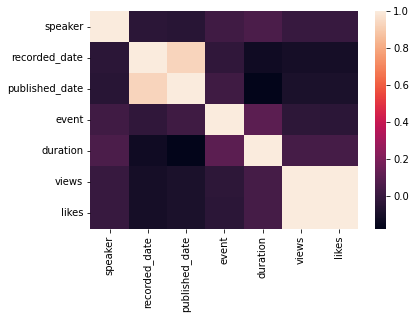

In [42]:
sns.heatmap(dataTED.corr())

In [43]:
dataTED.describe()

,speaker,recorded_date,published_date,event,duration,views,likes
count,5701.000000,5701.000000,5701.000000,5701.000000,5701.000000,5.701000e+03,5.701000e+03
mean,2289.235924,896.813892,2106.021400,186.518330,706.021751,2.147123e+06,6.386154e+04
std,1343.591975,543.377567,1013.793501,141.130986,519.196825,3.711874e+06,1.098655e+05
min,0.000000,0.000000,0.000000,0.000000,60.000000,4.560000e+02,1.300000e+01
25%,1126.000000,401.000000,1281.000000,99.000000,354.000000,6.859920e+05,2.000000e+04
50%,2269.000000,925.000000,2451.000000,125.000000,679.000000,1.405696e+06,4.200000e+04
75%,3454.000000,1327.000000,2908.000000,210.000000,924.000000,2.189406e+06,6.500000e+04
max,4636.000000,1899.000000,3548.000000,636.000000,20404.000000,7.393596e+07,2.200000e+06


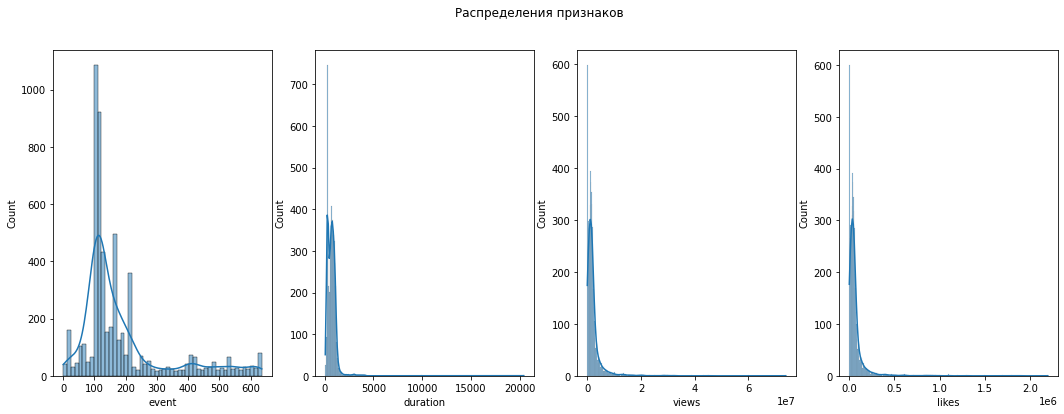

In [44]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(dataTED['event'], ax = ax[0], kde = True)
sns.histplot(dataTED['duration'], ax = ax[1], kde = True)
sns.histplot(dataTED['views'], ax = ax[2], kde = True)
sns.histplot(dataTED['likes'], ax = ax[3], kde = True)
None

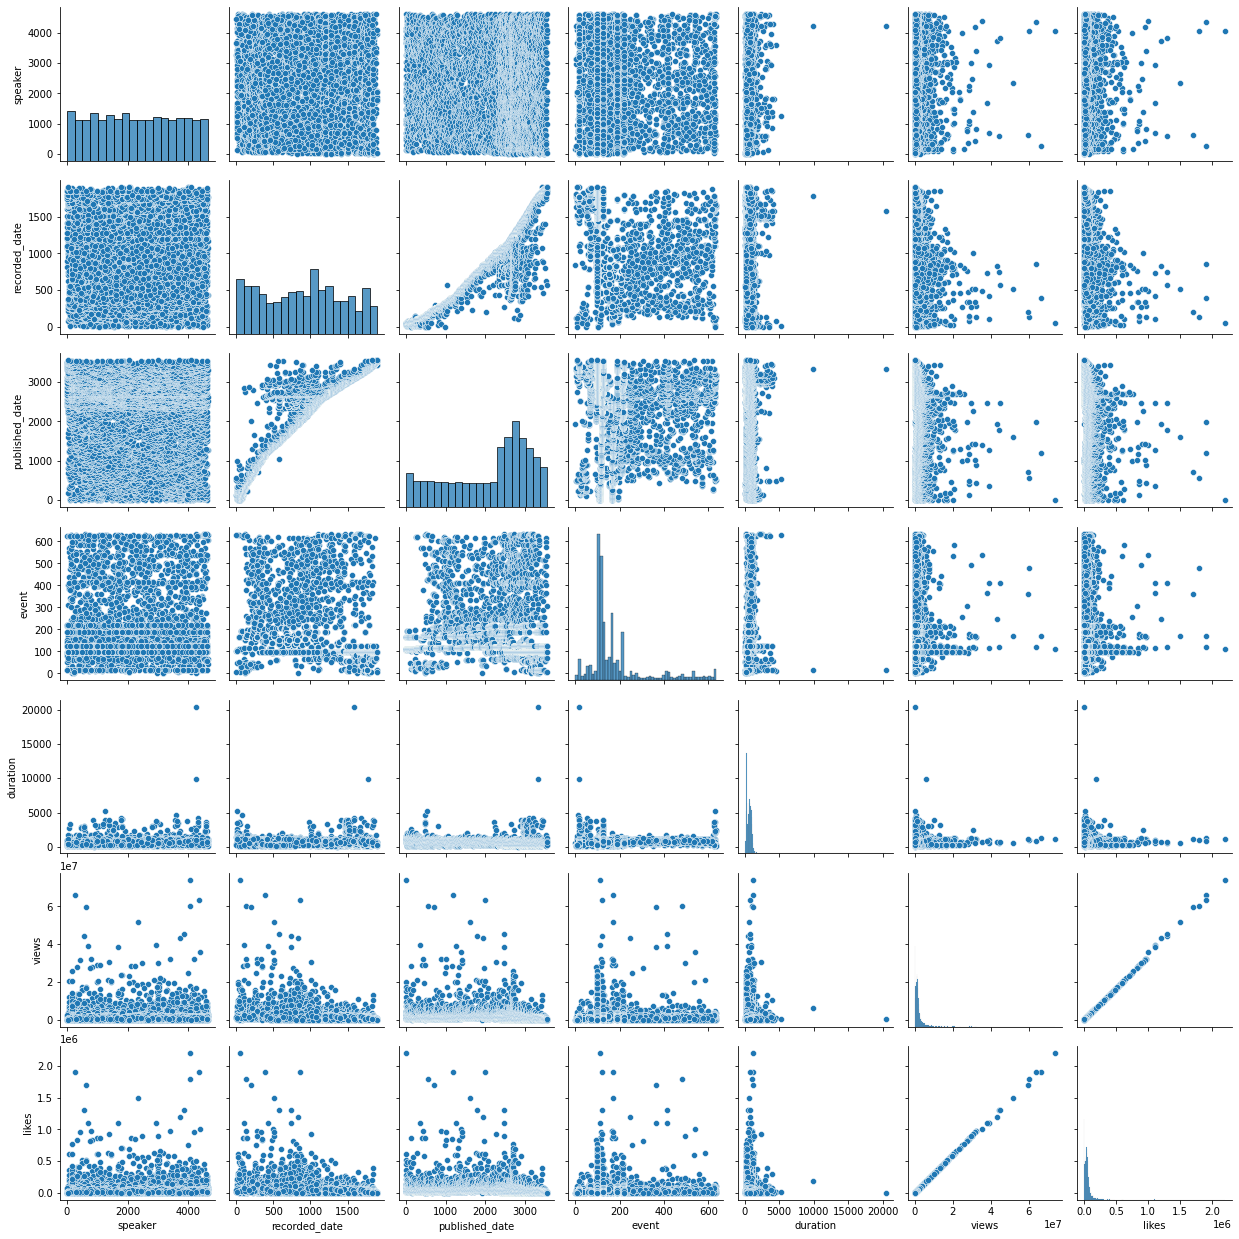

In [45]:
sns.pairplot(data=dataTED)
None

In [46]:
def scores_regr(model, data, target):
    pred = model.predict(data)
    print("Max error:", max_error(target, pred))
    print("MAE:", mean_absolute_error(target, pred))
    print("MSE:", mean_squared_error(target, pred))
    print("R^2:", r2_score(target, pred))
    fig = plt.figure(figsize=(6, 6))
    fig.add_subplot(111, aspect='equal')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.axline((0, 0), (1, 1), ls='--', c='grey')
    plt.scatter(target, pred, marker='o')
    plt.show()

In [47]:
X = dataTED.drop("views", axis = 1).to_numpy()
Y = dataTED["views"].to_numpy()

print("Размерность входных данных:", X.shape)
print("Размерность выходных данных:", Y.shape)

train_XTED, test_XTED, train_YTED, test_YTED = train_test_split(X, Y, train_size = 0.8, random_state = 1, shuffle = True)

print("Размерность тренировочных входных данных:", train_XTED.shape)
print("Размерность тренировочных выходных данных:", train_YTED.shape)

print("Размерность тестовых входных данных:", test_XTED.shape)
print("Размерность тестовых выходных данных:", test_YTED.shape)

Размерность входных данных: (5701, 6)
Размерность выходных данных: (5701,)
Размерность тренировочных входных данных: (4560, 6)
Размерность тренировочных выходных данных: (4560,)
Размерность тестовых входных данных: (1141, 6)
Размерность тестовых выходных данных: (1141,)


### Одиночное дерево
#### Предсказание

In [48]:
dt_cv = GridSearchCV(Pipeline([('scaler', Normalizer()), ('tree', DecisionTree())]), 
                     {'tree__criterion': ['mse', 'poisson'], 'tree__max_depth': [10, 20, None], 
                      'tree__min_leaf_size': [1, 5, 10], 'tree__answer': ['mean', 'median']})
dt_cv.fit(train_XTED, train_YTED)
print(dt_cv.best_params_, dt_cv.best_score_, sep='\n') # raise

{'tree__answer': 'median', 'tree__criterion': 'poisson', 'tree__max_depth': 10, 'tree__min_leaf_size': 10}
0.8172425383868849


Max error: 46155766.0
MAE: 471358.73225241015
MSE: 4421423837458.912
R^2: 0.789971767232015


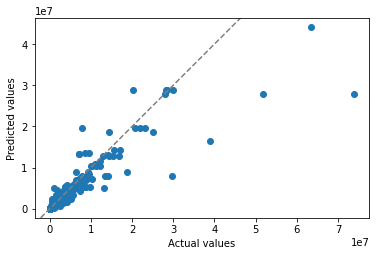

In [49]:
dt = dt_cv.best_estimator_
scores_regr(dt, test_XTED, test_YTED)

### Случайный лес

In [50]:
rf_cv = GridSearchCV(Pipeline([('scaler', Normalizer()), ('rf', RandomForest(answer='mean', max_features=5))]),
                     {'rf__max_samples': [0.8, 1], 'rf__n_estimators': [30, 50], 
                      'rf__min_leaf_size': [1, 5], 'rf__criterion': ['mse', 'poisson']})
rf_cv.fit(train_XTED, train_YTED)
print(rf_cv.best_params_, rf_cv.best_score_, sep='\n')

{'rf__criterion': 'mse', 'rf__max_samples': 1, 'rf__min_leaf_size': 5, 'rf__n_estimators': 30}
0.8620347286702591


Max error: 33409952.81666667
MAE: 369338.28431444155
MSE: 2580043247087.6074
R^2: 0.8774417600366909


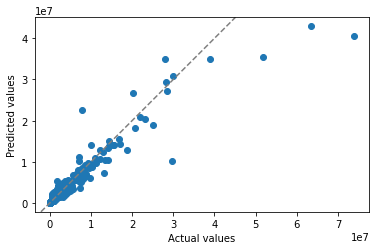

In [51]:
rf = rf_cv.best_estimator_
scores_regr(rf, test_XTED, test_YTED)

### Сравним с моделью из sklearn

{'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
0.9971399801127646
Max error: 10059053.920000002
MAE: 28486.927896581936
MSE: 121458212195.15195
R^2: 0.9942304437212317


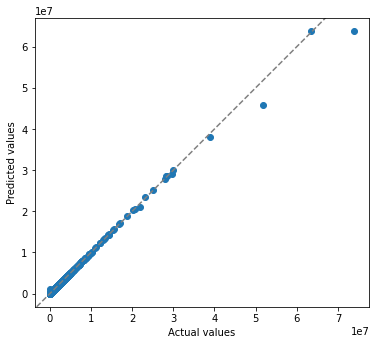

In [52]:
rf_cv = GridSearchCV(RandomForestRegressor(), 
                         {'criterion': ["squared_error", "absolute_error", "poisson"],
                          'n_estimators': [50, 100],
                          'max_depth': [10, 100, None], 
                          'min_samples_leaf': [1, 50, 100]})
rf_cv.fit(train_XTED, train_YTED)
print(rf_cv.best_params_, rf_cv.best_score_, sep='\n')

scores_regr(rf_cv, test_XTED, test_YTED)

### Вывод 

Выполнив лабораторную работу № 3, я вспомнил и реализовал алгоритм логистической регрессии и в первый раз реализовал дерево решений и случайный лес для случая регрессии. В алгоритмах регрессии, как реализованных мною так и из библиотеки sklearn, среднеквадратичное отклонение и другие метрики имеют большие отклонения из-за сильного разброса показателя просмотров, который я предсказываю.